In [1]:
# Load libraries
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

from sklearn.preprocessing import StandardScaler, LabelEncoder;
from sklearn.linear_model import LinearRegression, Lasso, Ridge;
from sklearn.model_selection import train_test_split, cross_val_score, KFold;
from sklearn.metrics import mean_squared_error;

import warnings;

pd.set_option('max_column', None);
warnings.filterwarnings('ignore');

## 1. Load data

In [2]:
# Load dataset
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BLACK', 'LSTAT', 'MEDV'];
data = pd.read_csv('Housing Boston/housing.csv', names=names, header=0);

In [3]:
# Shape the dataset
print(data.shape);

(506, 14)


In [4]:
# Peek at the dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# Let's look at types of dataset
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
BLACK      float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
# Let's check nan values
data.isna().sum().any()

False

In [7]:
# Let's check duplicated values
data[data.duplicated(keep=False)].shape

(0, 14)

## 2. EDA

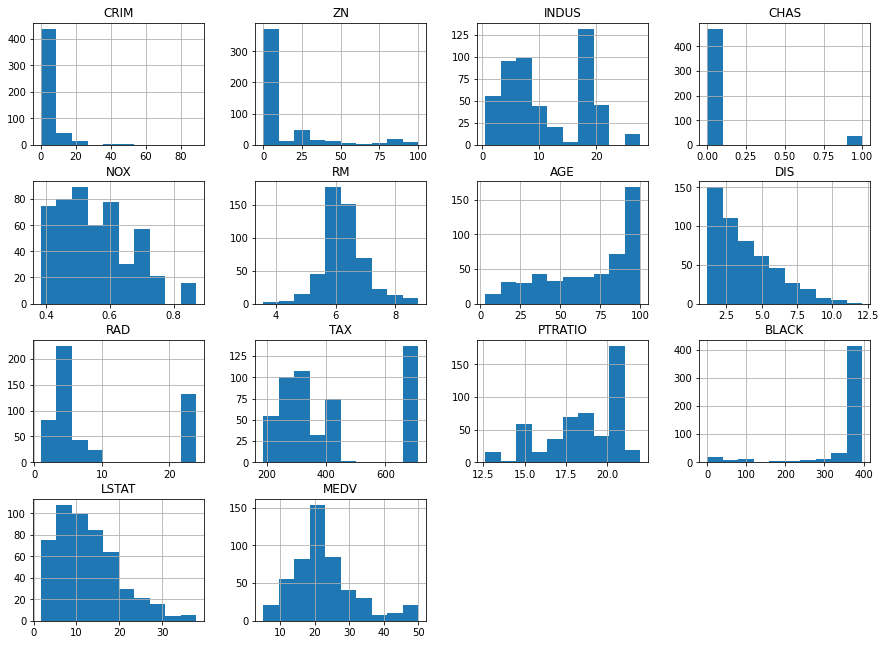

In [8]:
# Histogram
data.hist(figsize=(15, 11));
plt.show()

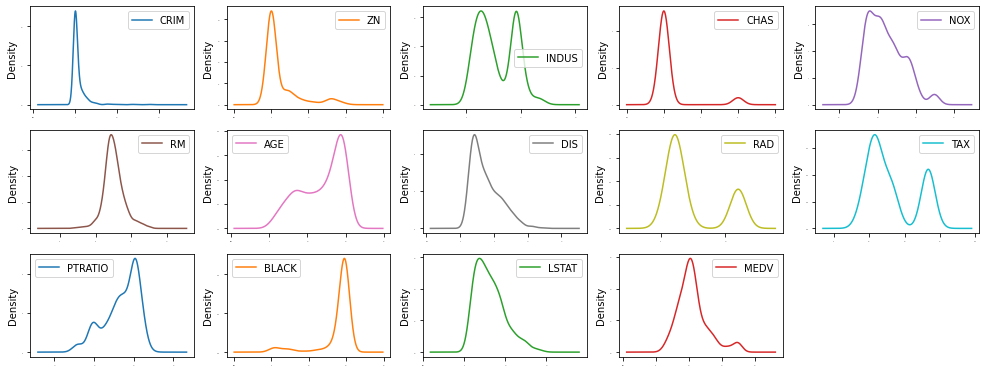

In [9]:
# Density
data.plot(kind='density', subplots=True, layout=(5,5), sharex=False, legend=True, fontsize=1, figsize=(17,11));
plt.show()

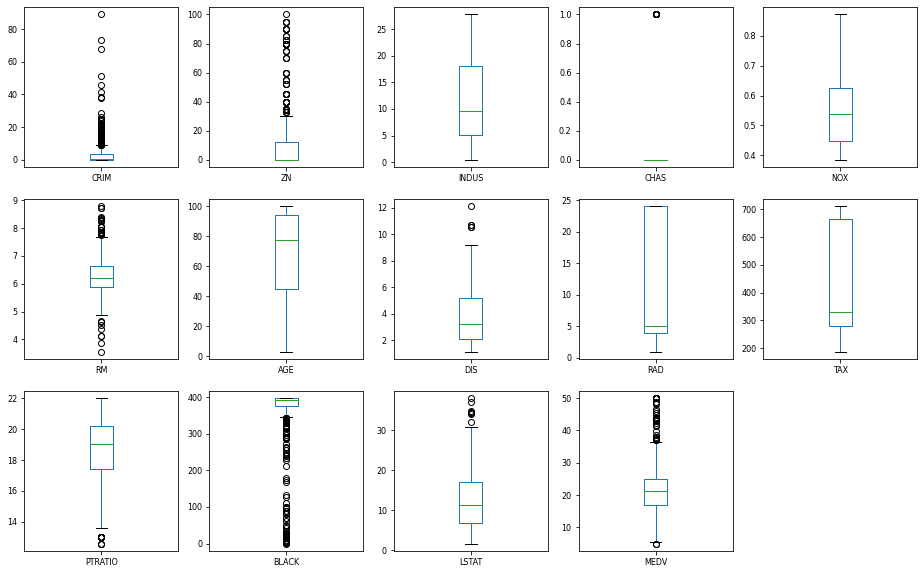

In [10]:
# Box and whisker plots
data.plot(kind='box', subplots=True, layout=(3, 5), sharex=False, sharey=False, fontsize=8, figsize=(16,10));
plt.show()

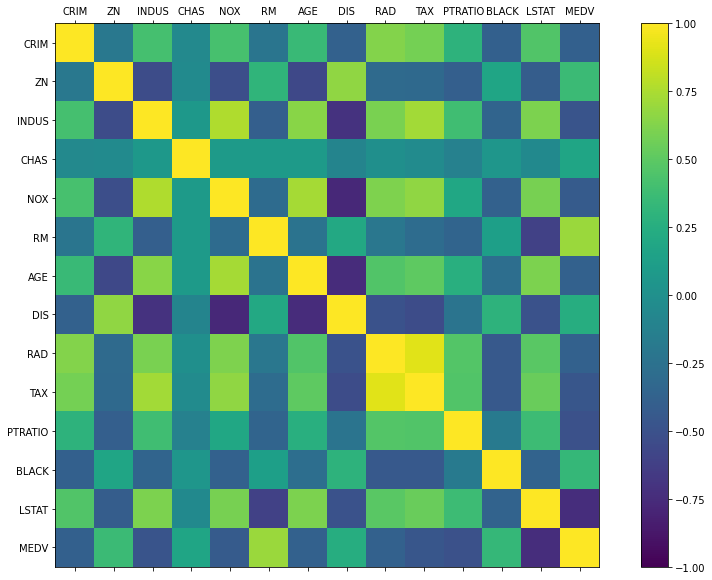

In [11]:
# Correlation matrix
fig = plt.figure(figsize=(15, 10));
ax = fig.add_subplot(111);
cax = ax.matshow(data.corr(method='pearson'), vmin=-1, vmax=1);
fig.colorbar(cax);
ticks = np.arange(0, 14, 1);
ax.set_xticks(ticks);
ax.set_yticks(ticks);
ax.set_xticklabels(names);
ax.set_yticklabels(names);
plt.show()

## 3. Processing

In [12]:
# Some processing

## 4. Transformation

In [13]:
# Categorical
data = pd.get_dummies(data, columns=['CHAS']);

In [14]:
# Numerical
data[data.columns.difference(['CHAS', 'MEDV'])] = StandardScaler().fit_transform(data[data.columns.difference(['CHAS', 'MEDV'])])
data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV,CHAS_0,CHAS_1
1,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0,0.272599,-0.272599
2,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6,0.272599,-0.272599
3,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7,0.272599,-0.272599
4,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4,0.272599,-0.272599
5,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2,0.272599,-0.272599


## 5. Split data & Fitting models

In [15]:
# Select main columns to be used in training
main_cols = data.columns.difference(['MEDV']); 
X = data[main_cols];
y = data['MEDV']

In [16]:
# Split out test and validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42); # test
# X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42); # validation

# Cross validation
kfold = KFold(n_splits=3,  shuffle=True, random_state=21);

In [17]:
# Fitting
linears = [];
linears.append(('LR', LinearRegression()));
linears.append(('RIDGE', Ridge()));
linears.append(('LASSO', Lasso()));

# Evaluate
for name, model in linears:
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold);
    print('%s : %.4f(%.4f)' % (name, -1 * scores.mean(), scores.std()));

LR : 24.6552(1.1490)
RIDGE : 24.5416(1.2379)
LASSO : 28.9675(2.0138)


## 6. Evaluate on test data

In [18]:
# Fit the best model
mod = LinearRegression();
mod = mod.fit(X_train, y_train);
y_pred = mod.predict(X_test);

In [19]:
# Evaluate each model in turn with kfold
print('Score :', mean_squared_error(y_test, y_pred));

Score : 21.51744423117729


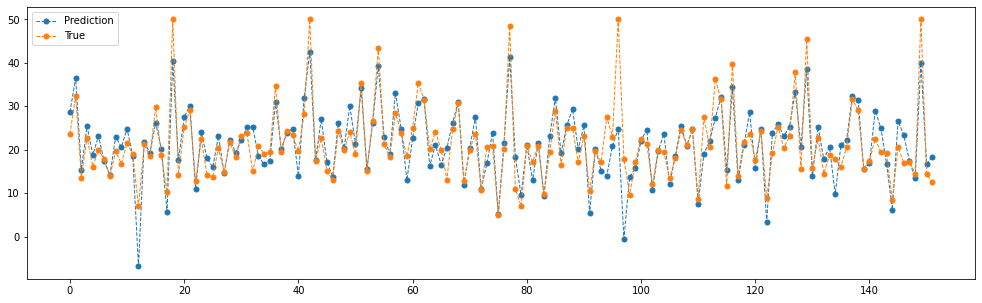

In [20]:
# Plotting predicted and true values
plt.figure(figsize=(17, 5))
plt.plot(np.arange(0, len(y_pred)), y_pred, 'o', linestyle='dashed', linewidth=1, markersize=5, label='Prediction')
plt.plot(np.arange(0, len(y_test)), y_test, 'o', linestyle='dashed', linewidth=1, markersize=5, label='True')
plt.legend()
plt.show()

## 7. Make persitent preprocessing data

In [21]:
data.to_csv('pre_housing.csv', index=False);